# <div style="font-size:35px; text-align:center; background:#017307; color:#A8FFAD; padding:10px; margin:5px; border-radius:20px;">Mall Customer Segmentation</div>

## <div style="font-size:30px; text-align:center; background:#028508; color:white; padding:10px; margin:5px; border-radius:20px;">Importing the Dependencies</div>

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

## <div style="font-size:30px; text-align:center; background:#028508; color:white; padding:10px; margin:5px; border-radius:20px;">Data Collection & Analysis</div>

In [2]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [3]:
# first 5 rows in the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# finding the number of rows and columns
customer_data.shape

(200, 5)

In [5]:
# getting some informations about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# Choosing the Annual Income Column & Spending Score column
X = customer_data.iloc[:,[3,4]]

In [8]:
# Normalizing the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

## <div style="font-size:30px; text-align:center; background:#028508; color:white; padding:10px; margin:5px; border-radius:20px;">Selecting Optimal No. of Clusters</div>

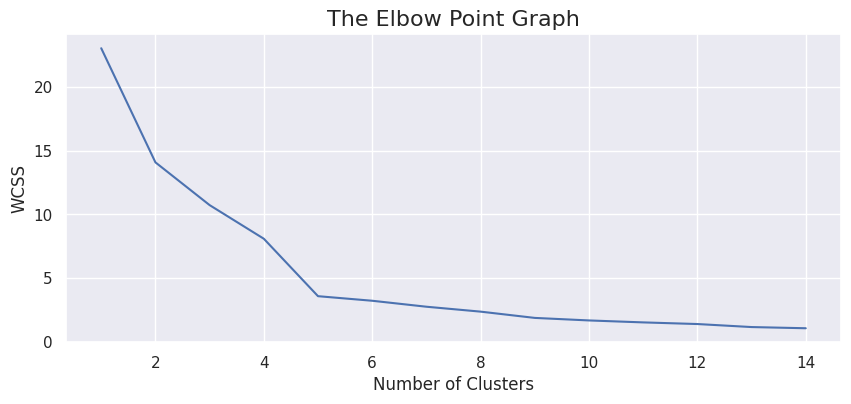

In [9]:
# finding wcss value for different number of clusters
wcss = []

for i in range(1,15):
    kmeans = KMeans(n_clusters=i, n_init='auto', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
    
# plotting elbow graph
sns.set()
plt.figure(figsize=(10,4))
plt.plot(range(1,15), wcss)
plt.title('The Elbow Point Graph', size=16)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

`Note`: Here we can clearly see that, Optimum Number of Clusters are 5

## <div style="font-size:30px; text-align:center; background:#028508; color:white; padding:10px; margin:5px; border-radius:20px;">Training K-Means Clustering Model</div>

In [10]:
# Initialize the KMeans algorithm with 5 clusters.
kmeans = KMeans(n_clusters=5, n_init='auto', random_state=42)

# Fit the KMeans algorithm to the data X and predict the cluster for each data point.
Y = kmeans.fit_predict(X)

# Add a new column 'Cluster' to the original dataset X, storing the cluster label for each data point.
X['Cluster'] = Y

## <div style="font-size:30px; text-align:center; background:#028508; color:white; padding:10px; margin:5px; border-radius:20px;">Visualizing all the Clusters</div>


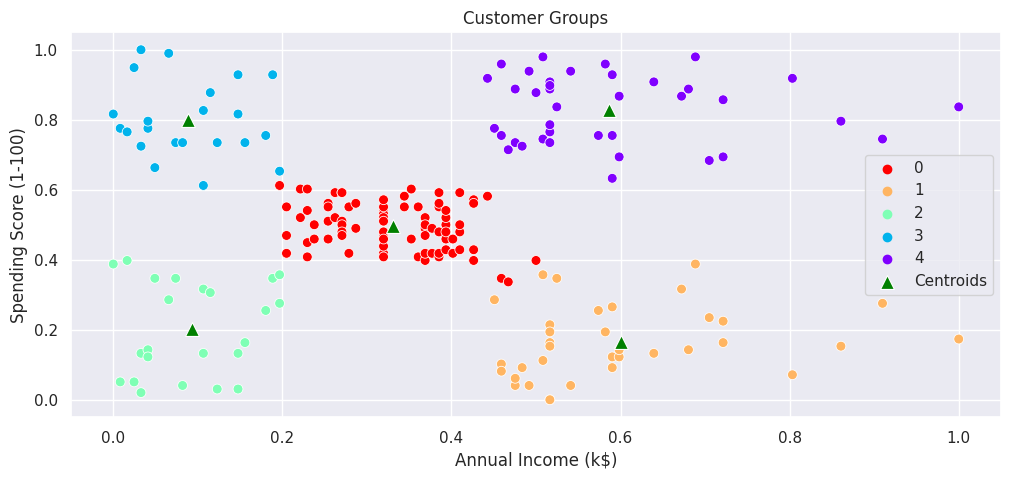

In [11]:
# Plotting all clusters with Seaborn
plt.figure(figsize=(12,5))
sns.scatterplot(data=X, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='rainbow_r', s=50)

# Plot the centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
sns.scatterplot(data=centroids, x='Annual Income (k$)', y='Spending Score (1-100)', color='green', s=100, label='Centroids', marker='^')
plt.title('Customer Groups')
plt.show()

## <div style="font-size:30px; text-align:center; background:#028508; color:white; padding:10px; margin:5px; border-radius:20px;">Conclusion</div>

In [12]:
# Analyzing Clusters
X.groupby(by='Cluster').mean().reset_index().style.background_gradient(cmap='Greens')

,Cluster,Annual Income (k$),Spending Score (1-100)
0,0,0.330298,0.495087
1,1,0.600000,0.164431
2,2,0.092659,0.203194
3,3,0.087928,0.799629
4,4,0.586381,0.827839


<div style="font-size:12px; background:#028508; color:white; padding:10px; margin:5px; border-radius:20px;">
    
#### Cluster 0 - Customers in Cluster 0 have low annual incomes but maintain average spending. They manage their finances carefully, balancing essential and discretionary purchases.
    
#### Cluster 1 - Cluster 1 includes customers with high incomes but low spending. They prefer saving or investing over spending, indicating a conservative financial approach.

#### Cluster 2 - Customers in Cluster 2 have very low incomes and low spending, focusing on essential needs with minimal expenditures due to limited financial resources.

#### Cluster 3 - Cluster 3 features customers with very low incomes but high spending. Despite limited means, they prioritize spending on non-essential or luxury items.

#### Cluster 4 - Cluster 4 consists of affluent customers with high spending. They are key targets for luxury goods or premium services, reflecting both financial capability and a strong willingness to spend.
<div>
